<a href="https://colab.research.google.com/github/HienNguyenMinh/PythonAssignment/blob/main/BaiTap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Học viên: Nguyễn Thị Minh Hiền

Khóa: MSE11_HCM


#Giải Thích Để Hiểu Về M5-Forecasting Bằng Tiếng Việt
#Giới thiệu:
Trong cuộc thi tên là M5-Forecasting, những người tham gia cuộc thi sử dụng dữ liệu bán hàng phân cấp được trích xuất từ Walmart cho việc phân tích và dự đoán doanh số hàng ngày trong 28 ngày tới. *(Walmart là công ty lớn nhất thế giới theo doanh thu)*.
Tập dữ liệu bán hàng chứa thông tin của khoảng 30.000 mặt hàng khác nhau trong gần 1900 ngày. Dữ liệu được phân bổ quanh các cửa hàng ở ba tiêu bang Hoa Kỳ (California, Texa và Wisconsin) bao gồm các cấp mặt hàng, bộ phận, danh mục sản phẩm và cấp chi tiết cửa hàng. Ngoài ra, tập dữ liệu cũng có các biến số giải thích về giá cả, các chương trình khuyến mãi, ngày trong tuần và các sự kiện đặc biệt. Hơn nữa, tập dữ liệu mạnh mẽ này không chỉ giúp cải thiện độ chính xác của dự báo, mà còn giúp hiển thị các mô hình bán hàng cơ bản thông qua các ngôn ngữ khác nhau cũng như dựa trên các danh mục sản phẩm khác nhau cung cấp giá trị cho các tầm nhìn kinh doanh.

Theo thực tế là một tập dữ liệu lớn được tạo sẵn, chúng ta bắt đầu với một công thức kinh doanh được đưa ra xoay quanh vài vấn đề. Liệu tập dữ liệu này có đủ để trả lời các câu hỏi đó hay không. Nếu câu trả lời chưa được tìm thấy từ tập dữ liệu này, thì ít nhất các thông tin cần thiết theo tập điểm dữ liệu cũng giúp cải thiện việc thiết kế dữ liệu trong tương lai. 

#Báo cáo vấn đề
Một tập dữ liệu lớn khiến cho việc tìm kiếm tất cả các mẫu cơ bản trong tập dữ liệu đó trở nên khó khăn. May mắn thay, việc đặt ra các hỏi có tính chất SMART rất hữu ích với việc hiểu các mẫu mà có thể vô tình không nhìn thấy nó trong lần đầu tiếp cận vào tập dữ liệu. *(SMART: cụ thể, có thể đo lường, có thể đạt được, có liên quan và có giới hạn thời gian)*.

Trong các vấn đề cụ thể của m5-forecasting đặc biệt quan tâm việc tìm ra câu trả lời cho các câu hỏi sau:

* Sự phân phối chung của các ID mặt hàng trên các danh mục là gì?
* Hành vi của các danh mục trên các cửa hàng khác nhau là gì?
* ID của mặt hàng bán chạy nhất?
* ID của mặt hàng trong mỗi danh mục có nhiều doanh thu nhất?
* Doanh thu bán hàng thu được nhiều nhất là bao nhiêu? Nó có phải là ID của các mặt hàng bán chạy nhất, mang lại doanh thu cao nhất, hoặc có thay đổi theo xu hướng không?
* Hành vi của tổng doanh số bán hàng là gì?
* Hành vi của ID các mặt hàng đang bán trong các ngày khác nhau trong tuần là gì? Có ngày cụ thể nào mà hôm đó có doanh thu cao nhất? Xu hướng thay đổi như thế nào ở các cửa hàng khác nhau?

Và cuối cùng, chúng tôi sẽ sử dụng SARIMAX và Facebook đã phát triển mô hình Prophet để dự báo doanh số bán hàng trong 28 ngày tới.

#Các chỉ số đánh giá:
Để đưa ra dự báo một chuổi thời gian (time series), chung ta dùng các error metrics sau:
1. RMSE (Root Mean Square Error): Để đánh giá dự báo bán hàng được thực hiện bằng SARIMAX, RMSE error metric được sử dụng. Chuỗi thời gian được sử dụng trong trường hợp này, lấy số lượng bán hàng trung bình được thực hiện, trong suốt gần 1900 ngày, bỏ qua việc sắp xếp dữ liệu thứ cấp ban đầu của id sản phẩm cùng với một số cấp độ khác. Mức độ tối đa của error metric RMSE không bị vô hiệu vì chúng tôi đang xem xét số lượng bán hàng trung bình được thực hiện, do đó tận dụng hiệu quả của rất nhiều số 0 đối với nhiều id sản phẩm, bên cạnh số ngày.
2. Custom Loss (WMAPE): error metric này được sử dụng cho những trường hợp mà mức độ ưu tiên của ID sản phẩm được xem xét cùng với doanh số đã thực hiện. Các trọng số được tính toán bằng cách chia sự khác biệt giữa dự báo và giá trị bán hàng thực tế cho giá trị trung bình của chúng.
3. WRMSSE (Weighted Root Mean Square Scaled Error): WRMSSE được tính khi khung dữ liệu sẵn sàng dự đoán (dự báo gần 30.000 id sản phẩm) đã sẵn sàng. Việc tính toán WRMSSE yêu cầu phải sử dụng tổng số mục nhập của tất cả id sản phẩm (gần 30.000 sản phẩm) và sau đó là sự khác biệt giữa các giá trị của tập dữ liệu xác thực, tức là sales_train_validation.csv và khung dữ liệu được dự báo. WRMSSE eror metirc này là chỉ số do cuộc thi cung cấp và đã được tối ưu hóa để sử dụng cho cuộc thi hiện tại. Để đánh giá nó, chúng tôi sẽ phải sử dụng toàn bộ tập dữ liệu của sales_train_validation.csv đã được cung cấp trong một tệp csv.


Tải các thư viện cần dùng: 

* Tải các module như numpy, pandas, pyplot, time, math, datetime, widgets..Dùng dòng lệnh: <font color='blue'> import <tên module> </font> hoặc <font color='blue'>import <tên module> as <định danh></font>

* Tải các hàm như display, KDTree...Dùng dòng lệnh: <font color='blue'>from <tên module> import <tên hàm></font>

In [1]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import time
import math
import datetime


# Import widgets
from ipywidgets import widgets, interactive, interact
import ipywidgets as widgets
from IPython.display import display

from math import log, floor
from sklearn.neighbors import KDTree

import seaborn as sns
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pywt
from statsmodels.robust import mad

import scipy
import statsmodels
from scipy import signal

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

import itertools
from itertools import cycle
plt.style.use('seaborn')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])


Install 'Git Large File Storage' để có thể tải các file dữ liệu có dung lượng lớn về google Colab.


Tải các file dữ liệu dùng cho việc phân tích và dự báo về google Colab bằng cách clone một reponsitory từ GitHub về google Colab :

In [2]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install
!git lfs clone https://github.com/HienNguyenMinh/PythonAssignment.git


Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Detected apt version as 1.6.14
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... Packagecloud gpg key imported to /etc/apt/keyrings/github_git-lfs-archive-keyring.gpg
done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following packages will be upgraded:
  git-lfs
1 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Need to get 7,168 kB of archives.
After this operation, 7,962 kB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ub

Khi muốn remove một thư mục trên google colab thì chạy command sau:

!rm -rf folder_path

In [ ]:
!rm -rf /content/PythonAssignment

Kiểm tra các file dữ liệu *.csv được tải về Colab thông qua việc duyệt cây thư mục vừa được tải về Colab và in ra đường dẫn các file dữ liệu: 

In [3]:
import os
for dirname, _, filenames in os.walk('/content/PythonAssignment/DataSet'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/PythonAssignment/DataSet/sales_train_evaluation.csv
/content/PythonAssignment/DataSet/calendar.csv
/content/PythonAssignment/DataSet/sell_prices.csv
/content/PythonAssignment/DataSet/sales_train_validation.csv
/content/PythonAssignment/DataSet/sample_submission.csv


Mô tả tập dữ liệu:

Các file data được tải vào notebook này như sau:

* calendar_df.csv - chứa các thông tin về những ngày mà sản phẩm được bán, thông tin về những ngày lễ và các dịp đặc biệt.
* train_sales_df.csv - Chứa dữ liệu lịch sử bán hàng hàng ngày cho mỗi sản phẩm và cửa hàng và ID bộ phận với gần như dữ liệu bán hàng trong 1900 ngày [d_1 - d_1913]
* submission_file.csv - Định dạng đúng cho tệp gửi, chứa id sản phẩm và id cột cho dự báo dữ liệu bán hàng 28 ngày tới.
* sell_prices_df.csv - chứa thông tin về giá của mỗi sản phẩm đã bán ở mỗi cửa hàng và ngày.
* sales_train_evaluation.csv - bao gồm các nhãn hàng [d_1 - d_1941] 

Đọc dữ liệu từ các file *.csv bằng hàm read_csv() của pandas:

In [4]:
sell_prices_df = pd.read_csv('/content/PythonAssignment/DataSet/sell_prices.csv')
train_sales_df = pd.read_csv('/content/PythonAssignment/DataSet/sales_train_validation.csv')
calendar_df = pd.read_csv('/content/PythonAssignment/DataSet/calendar.csv')
submission_file = pd.read_csv('/content/PythonAssignment/DataSet/sample_submission.csv')

In đầy đủ sơ lược của dataframe để hiểu tập dữ liệu:

In [ ]:
sell_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [ ]:
train_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


Bây giờ chúng ta đã xem xét dữ liệu được cung cấp và hiểu chung về tập dữ liệu, chúng ta có thể thấy các mối quan hệ khác nhau giữa các cửa hàng, các sản phẩm cụ thể được bán, danh mục mà người tiêu dùng quan tâm nhất cũng như việc bán các mặt hàng cho mỗi ngôn ngữ cụ thể. Sell_prices_df chứa thông tin dọc theo cấp độ cửa hàng của khoảng 6 triệu mục nhập trong khi train_sales_df có thông tin về khoảng 30.000 sản phẩm khác nhau.

Hơn nữa, tập dữ liệu trong calendar_df giúp bạn có thể thực hiện phân tích chuỗi thời gian của các sản phẩm đã bán.

#Phân tích dữ liệu khám phá:

**Các câu hỏi về Phân phối Sản phẩm & Hành vi Qua Dòng thời gian**

Bắt đầu với khung dữ liệu được biểu thị bằng train_sales_df có thông tin cụ thể về mặt hàng ('id'), ngôn ngữ cụ thể ('store_id', 'state_id') và ngày bán hàng cụ thể (d_1 đến d_1913); trước tiên chúng ta hãy thực hiện các điều chỉnh cần thiết để tách các ngày bán hàng để chỉ có thể dễ dàng quan sát phân tích dọc theo item_id, store_id và dept_id trong các ngày bán hàng.

Lấy 3 dòng dữ liệu đầu tiên trong dataframe train_sales_df:

In [5]:
train_sales_df.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


Lặp qua các cột của data frame và lấy giá trị trong các cột (d_1 đến d_c1913) để tính toán:
* Tổng số item bán được trong tất cả các ngày
* Trung bình số item bán được trong tất cả các ngày
* Midle of items bán được trong tất cả các ngày

In [8]:
#Lặp qua các cột của data frame và lấy giá trị trong các cột (d_1 đến d_c1913) để tính toán 
d_cols = [c for c in train_sales_df.columns if 'd_' in c]
#Tính tổng số item bán được trong tất cả các ngày
train_sales_df['total_sales_all_days'] = train_sales_df[d_cols].sum(axis = 1)
#Tính trung bình số item bán được trong tất cả các ngày
train_sales_df['avg_sales_all_days'] = train_sales_df[d_cols].mean(axis = 1)
#Tính midle of items bán được trong tất cả các ngày
train_sales_df['median_sales_all_days'] = train_sales_df[d_cols].median(axis = 1)
#train_sales_df.groupby(['id'])['total_sales_all_days'].sum().sort_values(ascending=False)

**Phân bố của Product_ids qua các danh mục?**

In [9]:
df = train_sales_df.groupby(['cat_id'])['id'].count().reset_index(name='total_entries')
fig = px.pie(df, values='total_entries', names='cat_id', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450, title = 'Distribution of Product_IDs Across Categories')
fig.show()


Thực phẩm là mặt hàng bán chạy nhất, tiếp theo là đồ gia dụng và sau đó là đồ sở thích.

**Phân bố của tổng số lượng bán được theo các tiểu bang?**

In [10]:
df = train_sales_df.groupby(['state_id'])['total_sales_all_days'].sum().reset_index()
fig = px.pie(df, values='total_sales_all_days', names='state_id', 
            color_discrete_sequence=px.colors.sequential.Aggrnyl,
            width = 750, height=450, title = 'Distribution of Total_Sales Across States')
fig.show()

Về tổng số lượng hàng bán, một lần nữa rõ ràng là số mặt hàng được bán trên tổng số mặt hàng có tỷ trọng đóng góp lớn nhất ở CA, tiếp theo là Texas và Wisconsin. Bây giờ nó là trường hợp với tổng doanh thu được tạo ra? Chúng tôi sẽ tìm ra điều đó bằng cách sử dụng khung dữ liệu doanh thu

In [11]:
df1 = train_sales_df.groupby(['cat_id'])['id'].count().reset_index(name='total_entries')
df2 = train_sales_df.groupby(['cat_id', 'state_id'])['total_sales_all_days'].sum().reset_index()

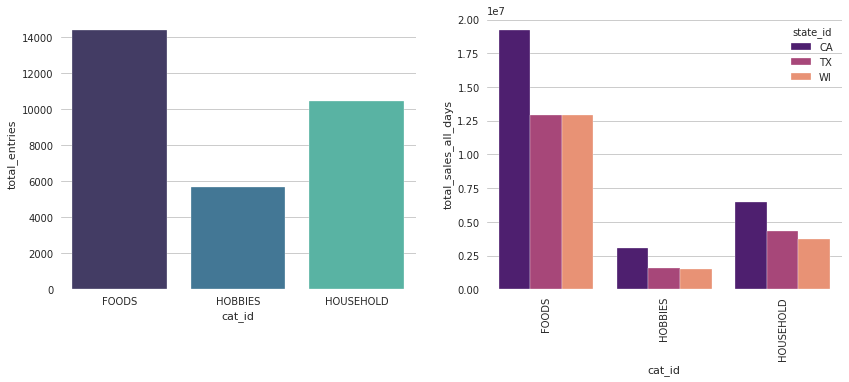

In [12]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

sns.barplot(x = 'cat_id', y='total_entries', data=df1, 
            palette='mako', ax=ax1)
sns.barplot(x = 'cat_id', y='total_sales_all_days', hue='state_id', data=df2, 
            palette='magma', ax=ax2)

plt.xticks(rotation=90)
plt.show()

Hai biểu đồ trên cho thấy:

* Hầu hết các mặt hàng được bán thuộc danh mục THỰC PHẨM, tiếp theo là HỘ GIA ĐÌNH và THÓI QUEN
* CA dẫn đầu về số lượng "Tổng số mặt hàng" được bán trong một trong hai danh mục (THỰC PHẨM, THÓI QUEN VÀ GIA DỤNG), trong khi WISCONSIN đứng sau TX trong mỗi danh mục ngoại trừ THỰC PHẨM. Chúng tôi sẽ xem liệu sự khác biệt tương tự có tác động đến doanh thu được trích từ các tiểu bang này hay không

In [13]:
df3 = train_sales_df.groupby(['cat_id', 'store_id'])['total_sales_all_days'].sum().reset_index()

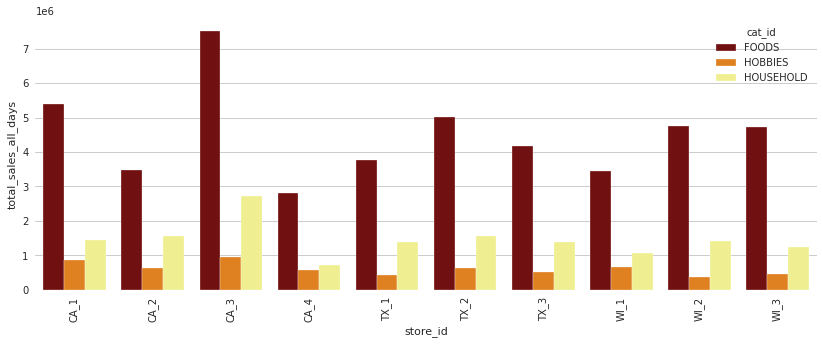

In [14]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, ax1 = plt.subplots(figsize=(14,5))

sns.barplot(x = 'store_id', y='total_sales_all_days', hue='cat_id', data=df3, 
           palette='afmhot', ax=ax1)

plt.xticks(rotation=90)
plt.show()

Kết quả giống nhau trên tất cả các cửa hàng

In [15]:
df = train_sales_df.groupby(['state_id', 'cat_id'])['id'].count().reset_index(name='num_sales_by_category')
fig = px.bar(df, x="state_id", y="num_sales_by_category", 
             color="cat_id", title="Distribution of Product_ids Count Across Categories & Each Locale")
fig.show()

Một số điểm có thể được rút ra từ quan sát này là:
* Hầu hết các mặt hàng đã được bán ở California
* Các cửa hàng ở Texas và Wisconsin có gần như tổng doanh thu, tức là trong cùng khung thời gian 1913 ngày, cùng số lượng mặt hàng đã được bán ở cả Texas và Wisconsin. Liệu quan sát này có đúng trong sell_prices_df (tập dữ liệu doanh thu) không? Liệu quan sát có giống nhau trên các địa điểm cửa hàng khác nhau ở cả Texas và Wisonconsin không?

**Phân phối các mặt hàng trên toàn bộ department & store_id?**

In [16]:
df = train_sales_df.groupby(['dept_id', 'store_id', 'state_id', 'cat_id'])[train_sales_df.columns[6:]].sum().reset_index()
df = df.sort_values('total_sales_all_days', ascending=False)

In [17]:
x_dept = df['dept_id']
x_store = df['store_id']

def items_sold_per_days(x_spec,title_text, title):
    
    '''
    returns plotly plots with drop down menus for specified parameter made in dataframe earlier
    
    inputs: x_spec (categorical feature on the x_axis), title_text(title on dropdown), 
            title (title of the plot)
            
    returns: plotly plots of categorical feature (x_axis) with dropdowns on specific 
    number of days        
    '''
    
    cols = ['d_1', 'd_50', 'd_300', 'd_500', 'd_700', 'd_900', 'd_1100', 'd_1500', 'd_1700',
        'total_sales_all_days', 'median_sales_all_days']

    buttons1 = [dict(method = "restyle",
                 args = [{'x': [x_spec, 'undefined'],
                          'y': [df[cols[k]], 'undefined'],
                          'visible':[True, False]}], 
                 label = cols[k])   for k in range(0, len(cols))]

    fig = go.Figure()
    fig.add_trace(go.Bar(x=x_spec, y = df['d_1'], name='Dept.Sales on day2',
                     marker_color='Crimson'))

    fig.update_layout(title_text= title_text,
                  title_x= 0.4, width=750, height=450, 
                  margin=dict(t=100, b=20, l=0, r=0),
                  autosize = False,
                  updatemenus=[dict(active=0,
                                    buttons=buttons1,
                                    x=0.08,
                                    y=1.13,
                                    xanchor='left',
                                    yanchor='top')
                              ]); 

    fig.add_annotation( x=0.00,  y=1.13, showarrow=False, xref='paper', yref='paper', xanchor='left',
                   text="With<br>"+str(title));
    fig.show()

items_sold_per_days(df['store_id'], 'Distribution of Sales Made on Each Store', 'Stores')
items_sold_per_days(df['state_id'], "Distribution of Sales Made In Each State", 'States')


Phân tích dữ liệu về những điểm này giúp làm rõ rằng:
* Về việc phân bổ doanh số bán hàng trên các id bộ phận, hầu hết doanh số bán hàng đã được thực hiện trên danh mục "FOODS_3", tiếp theo là hầu hết doanh số bán hàng được thực hiện trên danh mục household_1
* Thông tin nhận dạng về ngôn ngữ của cửa hàng cùng với hệ thống quản lý state_ids được nhúng làm rõ ràng rằng việc phân bổ doanh số bán hàng trên các cửa hàng ở Texas và Wisconsin KHÔNG giống nhau, mặc dù tổng số lượng đại diện trên các danh mục (thực phẩm, nơi ở và sở thích) có thể giống nhau.
* Các cửa hàng hoạt động tốt hơn ở Mỗi bang CA, TX và Wisonsin là các cửa hàng có id CA_3, TX_2 và WI_3 tương ứng

**Mặt hàng cụ thể Bán chạy nhất?**

Vì train_sales_df chứa thông tin về từng mặt hàng cụ thể và số lượng bán được, chúng tôi cũng có thể thực hiện một vài nhận xét về mặt hàng được mua thường xuyên nhất.

Chúng tôi có thể lập biểu đồ hành vi của nó trong số ngày để có được ý chính chung về mô hình bán hàng của nó trong những ngày nhất định. tức là d_1 đến d_1913

In [18]:
train_sales_df.groupby(['id'])['total_sales_all_days'].sum().sort_values(ascending=False)

id
FOODS_3_090_CA_3_validation        250502
FOODS_3_586_TX_2_validation        192835
FOODS_3_586_TX_3_validation        150122
FOODS_3_586_CA_3_validation        134386
FOODS_3_090_CA_1_validation        127203
                                    ...  
FOODS_2_071_TX_3_validation            16
FOODS_2_057_WI_2_validation            16
HOBBIES_1_170_WI_3_validation          13
FOODS_3_778_CA_2_validation            12
HOUSEHOLD_1_020_CA_3_validation        10
Name: total_sales_all_days, Length: 30490, dtype: int64

Sau khi tổng số lần bán hàng đã được nhóm lại theo id mặt hàng cụ thể, tức là thông số 'id', rõ ràng mặt hàng "FOODS_3_090_CA_3_validation" rõ ràng đã bán được hầu hết các đơn vị so với bất kỳ mặt hàng nào khác trong danh mục theo sau là "FOODS_3_586_TX_2_validation". tức là mặt hàng đầu tiên thuộc danh mục food_3 và được bán tại địa điểm cửa hàng CA_3.

Tương tự, cửa hàng thứ hai thuộc về vị trí cửa hàng TX_2 (tức là cửa hàng thứ hai ở Texas) cũng thuộc cùng danh mục FOODS_3, điều này cũng phù hợp với các quan sát được thực hiện trước đó

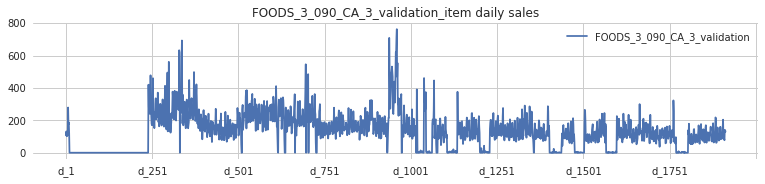

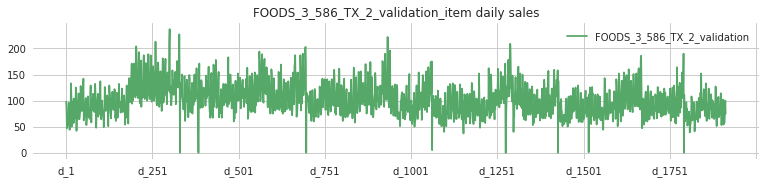

In [19]:
sns.set_style('whitegrid')

def plot_dailysales(spec_id):
    """
    plots the behavior of dailysales of specific ids i.e. spec_id
    
    input: spec_id
    returns : number of sales plotted across number of days 
    """
    train_sales_df.loc[train_sales_df['id'] == spec_id ].set_index('id')[d_cols]\
                .T\
                .plot(figsize = (13,2.5),
                      title =  str(spec_id)+"_item daily sales", 
                      color = next(color_cycle) )
    plt.legend()
    plt.show()

plot_dailysales('FOODS_3_090_CA_3_validation') 
plot_dailysales('FOODS_3_586_TX_2_validation')

**ID mặt hàng bán chạy nhất trong mỗi danh mục?**

In [20]:
df_agg = pd.DataFrame(train_sales_df.groupby(['id', 'cat_id', 'store_id'])['total_sales_all_days'].sum().sort_values(ascending=False))
df_agg = df_agg.reset_index()
df_agg.head(3)

,id,cat_id,store_id,total_sales_all_days
0,FOODS_3_090_CA_3_validation,FOODS,CA_3,250502
1,FOODS_3_586_TX_2_validation,FOODS,TX_2,192835
2,FOODS_3_586_TX_3_validation,FOODS,TX_3,150122


Bây giờ tập dữ liệu đã được sắp xếp theo thứ tự giảm dần của tổng doanh số, sẽ dễ dàng hơn rất nhiều để ước tính item_id ('id') bán chạy hơn những người khác trong mỗi danh mục

In [21]:
print("The 3 item_ids outselling most in FOODS category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'FOODS']['id'][:3])))
print("The 3 item_ids outselling most in HOUSEHOLDS category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'HOUSEHOLD']['id'][:3])))
print("The 3 item_ids outselling most in HOBBIES category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'HOBBIES']['id'][:3])))

The 3 item_ids outselling most in FOODS category are: ['FOODS_3_090_CA_3_validation', 'FOODS_3_586_TX_2_validation', 'FOODS_3_586_TX_3_validation']
The 3 item_ids outselling most in HOUSEHOLDS category are: ['HOUSEHOLD_1_118_CA_3_validation', 'HOUSEHOLD_1_459_CA_3_validation', 'HOUSEHOLD_1_334_CA_3_validation']
The 3 item_ids outselling most in HOBBIES category are: ['HOBBIES_1_234_CA_3_validation', 'HOBBIES_1_348_CA_1_validation', 'HOBBIES_1_371_CA_1_validation']


In [ ]:
#df = pd.DataFrame({"days": list(train_sales_df[train_sales_df['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].columns),
#                   "sales_data": list(train_sales_df[train_sales_df['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].values.flatten())})

In [22]:
#fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 7))

def plot_sample_sales(spec_id, sm_start, sm_end, samples_pick=50):
    """
    plots sample sales data with selection point and ending point specified, along with
    samples_pick point that specifies the samples picked after specified intervals
    
    input: spec_id (item_id or id), sm_start (sample_start), sm_end(sample_end),
    samples_pick (samples picked after how many intervals)
    
    returns: outputs a graph of sample points plotted against daily sales data d_1 to d_1913
    """
    fig, ax1 = plt.subplots(figsize=(13, 2.5))
    
    x1 = list(train_sales_df[train_sales_df['id'] == spec_id][d_cols]\
              .columns)[sm_start:sm_end]
    y1 = list(train_sales_df[train_sales_df['id'] == spec_id][d_cols]\
              .values.flatten())[sm_start:sm_end]
    
    #this conversion for regplot only
    x1 = [x.replace("d_", "") for x in x1]
    x1 = [int(x) for x in x1]
    
    #sns.lineplot(x=x1, y=y1, ax=ax1)
    sns.regplot(x=x1, y=y1, order=10, ax=ax1)
    ax1.set_ylabel("Number of Sales")
    ax1.set_xlabel("Days")

    ax1.set_xticks(x1[::samples_pick])
    ax1.set_xticklabels(x1[::samples_pick], rotation=0)

    fig.tight_layout()
    plt.show()

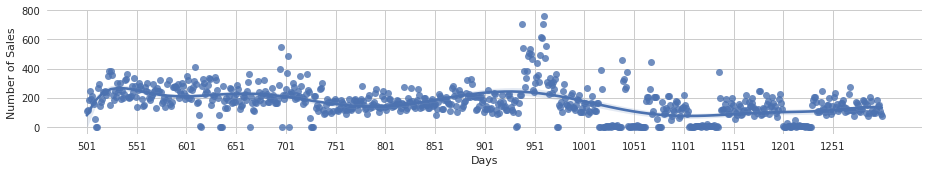

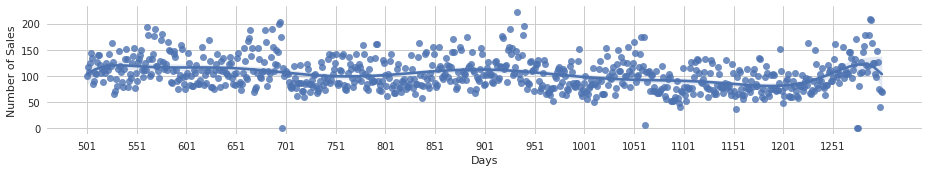

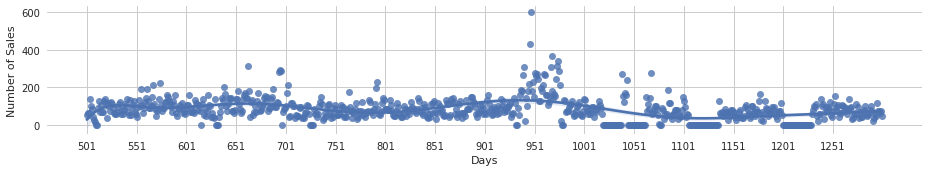

In [23]:
plot_sample_sales('FOODS_3_090_CA_3_validation', 500, 1300)
plot_sample_sales('FOODS_3_586_TX_2_validation', 500, 1300)
plot_sample_sales('FOODS_3_090_CA_1_validation', 500, 1300)

Nhìn vào các biểu đồ ở trên, mô hình hồi quy của chúng tôi thực hiện khá tốt việc điều chỉnh dòng theo xu hướng bán hàng được quan sát từ ngày thứ 500 đến ngày thứ 900, cho id mặt hàng 'FOODS_3_090_CA_3_validation' và 'FOODS_3_586_TX_2_validation'.

Biểu đồ cũng chỉ ra các xu hướng tương tự của đáy và đỉnh giữa các ngày cụ thể chỉ ra sự xuất hiện của các dịp và sự kiện đặc biệt đang thúc đẩy doanh số bán hàng. (Để làm _ giải thích theo thứ tự của đa thức và lấy nhiều trường hợp id hơn trên các loại thực phẩm, danh mục gia dụng trên các cửa hàng khác nhau)

**Câu hỏi về Doanh thu bán hàng?**

Trước hết, chúng tôi muốn tìm hiểu xem doanh thu cụ thể đối với từng sản phẩm là bao nhiêu? Nhưng vì chúng tôi chưa được cung cấp tập dữ liệu với id (product_ids) trong sell_prices_df (khung dữ liệu doanh thu) và có sự không khớp trong các mục nhập tập dữ liệu giữa cả hai tập dữ liệu (train_sales_df với gần 30000 hàng và sell_prices_df với gần 6 triệu mục nhập), do đó, atbest, một ước tính sơ bộ có thể được thực hiện bằng cách hợp nhất cả hai tập dữ liệu.

Thật tuyệt vời, Khung dữ liệu doanh thu (sell_prices_df) có sẵn dữ liệu mức phân loại, vì vậy chúng tôi có thể ước tính về các mặt hàng được bán trong từng danh mục để xem giá cụ thể mà hầu hết các mặt hàng đang được bán là bao nhiêu.

Trước tiên, chúng tôi sẽ thử điều chỉnh phương pháp phân phối xác suất phi tham số vì chúng tôi nghi ngờ rằng phân phối dữ liệu có thể không phải là bản sao chính xác của phân phối mà chúng tôi đã thấy trước đây và có thể bao gồm các đỉnh hoặc giá trị ngoại lai.
(https://machinelearningmastery.com/probability-density-estimation/)

Nếu hành vi phân phối dữ liệu không giống với một phân phối đã biết, thì việc điều tra thêm sẽ được thực hiện để loại bỏ các ngoại lệ dữ liệu cụ thể

In [24]:
sell_prices_df.head(3)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26


In [25]:
# making a new column category out of the item_id 
sell_prices_df['category'] = sell_prices_df['item_id'].str.split("_", expand=True)[0]

**Phân phối giá giữa các loại?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



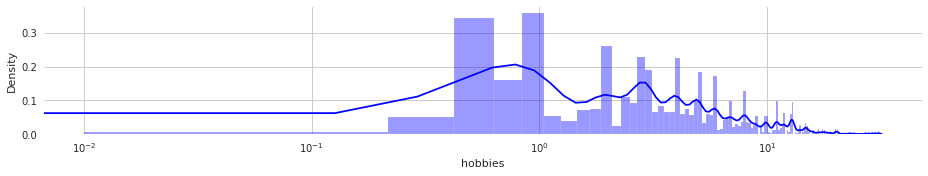

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



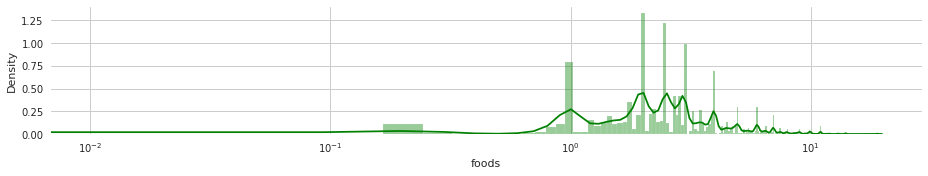

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



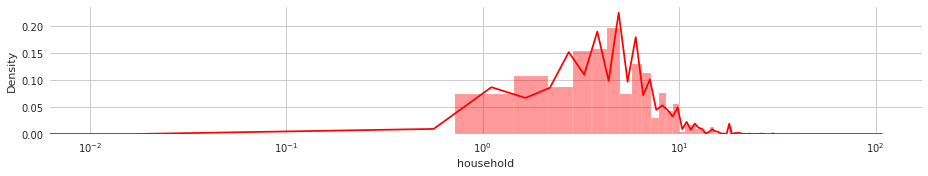

In [26]:
sns.set_style('whitegrid')
#plt.figure(figsize=(15,5))

def kde_plotting(df, category, bin_size, color, label):
    
    '''
    plots the kde density plot of the continuous features of df specified
    
    inputs: df, category(whether, foods, household or hobbies), bin_size(bin size for histogram)
            color (color of the plot), label (label to the plot)
    returns: kde plots with logarithmic scale taken on x_axis
            
    '''
    fig, ax1 = plt.subplots(figsize=(13, 2.5) )

    sns.distplot(df[df['category'] == category]['sell_price'], 
               axlabel = label ,bins=bin_size, color = color, ax=ax1) 

    fig.tight_layout()
    ax1.set_xscale('log')
    plt.legend()
    plt.show()
    
kde_plotting(sell_prices_df, 'HOBBIES', 150, 'b', 'hobbies')   
kde_plotting(sell_prices_df, 'FOODS', 250, 'g', 'foods') 
kde_plotting(sell_prices_df, 'HOUSEHOLD', 150, 'r', 'household') 

Chúng tôi có thể trích xuất thông tin hữu ích sau đây bằng cách xem các lô kde này.
* Biểu đồ phân phối xác suất của các mặt hàng gia dụng tuân theo phân phối gần như chuẩn với giá trị trung bình tập trung vào mức giá 5 Đô la và hầu hết các mặt hàng được bán trong phạm vi 1 đến 10 Đô la. Điều này cho thấy rằng hầu hết các mặt hàng gia dụng đang được bán nằm trong khung giá từ 25 xu đến 10 đô la
* Giá các mặt hàng thực phẩm là một phân phối đa phương thức cho thấy mức độ quan tâm thường xuyên giữa các mặt hàng thực phẩm được mua. Các giá trị xảy ra cả đối với khung giá tương đối cao hơn cũng như khung giá thấp hơn cho thấy mức độ quan tâm của người tiêu dùng đối với các mặt hàng thực phẩm không chỉ khác nhau mà các cửa hàng Walmart có danh mục các mặt hàng thực phẩm đang thu hút sự quan tâm của người tiêu dùng trên các danh mục khác nhau. . Khung giá trong trường hợp này cũng nằm trong khoảng từ 2 xu đến 10 đô la với chỉ rất ít mặt hàng được bán vượt quá phạm vi đó
* Phân phối xác suất của giá các mặt hàng liên quan đến sở thích chỉ ra sự kết hợp giữa phân phối đa phương thức và đa phương thức. Điều này cho thấy rằng trong khi một số mặt hàng trong danh mục cụ thể được bán nhiều hơn những mặt hàng khác (đỉnh đầu tiên nằm trong khu vực từ 0,01 đô la đến 1 đô la) thì cũng có những mặt hàng hướng tới khung giá tương đối cao hơn cũng được bán khá thường xuyên. nó là một phân phối đa phương thức với các đỉnh giảm nhỏ cho thấy sự quan tâm giảm dần đối với các mặt hàng liên quan đến sở thích tương đối đắt tiền nhưng đủ đáng kể để tạo ra sự quan tâm của người tiêu dùng.

**Loại bỏ các yếu tố ngoại lai để quan sát phân phối giá?**

**Phương pháp phần tư**

In [27]:
def remove_outliers(df):
    
    '''
    removes the outliers in continous features using quartile ranges
    
    inputs: df(df specified with continous features along side categorical features)
    returns: df with removed outliers
    '''
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    
    return df_final

df = sell_prices_df[['category', 'sell_price']]
df = remove_outliers(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



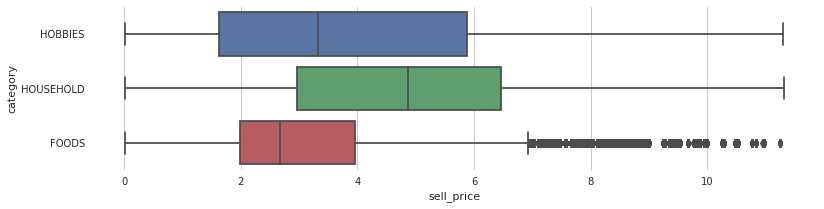

In [28]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.boxplot(y=df['category'], x=df['sell_price'])
plt.show()


Sau khi loại bỏ hầu hết các ngoại lệ, rõ ràng là đối với
* Các mặt hàng liên quan đến THỰC PHẨM, 75% mặt hàng được bán là những mặt hàng có giá dưới 4 đô la
* Các mặt hàng liên quan đến THÓI QUEN, 75% các mặt hàng được bán dưới 6 đô la với giá trung bình tập trung vào khoảng 3,25-3,5 đô la
* Các mặt hàng GIA DỤNG, 75% các mặt hàng được bán dưới 6,5 đô la.

Nó cũng thể hiện rằng có khá nhiều ngoại lệ trong dữ liệu giá của chúng tôi. Vì chúng tôi đã quan sát trước khi sử dụng kdeplots, rằng phân phối của tập dữ liệu chủ yếu bị lệch, chúng tôi đã sử dụng phương pháp phần tư để loại bỏ các giá trị ngoại lệ.

(https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/)

**Phân phối doanh số vào các ngày trong tuần và các dịp đặc biệt?**

Tập dữ liệu thứ ba của chúng tôi có tên, calendar_df, cung cấp thông tin có giá trị theo thời gian cho tập dữ liệu product_id.

Tập dữ liệu này cũng chứa thông tin về các dịp Đặc biệt, SNAP (Chương trình Hỗ trợ Dinh dưỡng Bổ sung) ở Hoa Kỳ và cùng với tập dữ liệu product_id, tức là train_sales_df sẽ hữu ích trong việc quan sát doanh số bán hàng cùng các ngày trong tuần, các ngày cụ thể và các dịp đặc biệt

In [29]:
calendar_df.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0


In [30]:
calendar_df.groupby(['event_name_1', 'event_type_1'])['wday'].count()

event_name_1         event_type_1
Chanukah End         Religious       5
Christmas            National        5
Cinco De Mayo        Cultural        5
ColumbusDay          National        5
Easter               Cultural        5
Eid al-Fitr          Religious       5
EidAlAdha            Religious       5
Father's day         Cultural        4
Halloween            Cultural        5
IndependenceDay      National        5
LaborDay             National        5
LentStart            Religious       6
LentWeek2            Religious       6
MartinLutherKingDay  National        5
MemorialDay          National        6
Mother's day         Cultural        6
NBAFinalsEnd         Sporting        6
NBAFinalsStart       Sporting        6
NewYear              National        5
OrthodoxChristmas    Religious       5
OrthodoxEaster       Religious       5
Pesach End           Religious       6
PresidentsDay        National        6
Purim End            Religious       6
Ramadan starts       Religious

Nhìn vào sự phân bổ dữ liệu trong 'event_name_1' và 'event_type_1', rõ ràng là dữ liệu ở đây liên quan đến các ngày lễ, điều này có thể tiết lộ các xu hướng quan trọng khi kết hợp với thông tin về doanh số bán hàng trong sự kiện cụ thể.

In [31]:
calendar_df.groupby(['event_name_2', 'event_type_2'])['wday'].count()

event_name_2    event_type_2
Cinco De Mayo   Cultural        1
Easter          Cultural        1
Father's day    Cultural        2
OrthodoxEaster  Religious       1
Name: wday, dtype: int64

Có vẻ như một số mục nhập chưa được tạo cho thuộc tính 'event_name_1' đã được cung cấp trong một danh mục khác

In [32]:
#Making in and including a new entry of days as well as merging the events_1 and event_2 into
# a single new events_names and types category

calendar_df['days'] = [d.split('-')[2] for d in calendar_df['date']]
calendar_df['events_names'] = pd.concat([calendar_df['event_name_1'], calendar_df['event_name_2']], 
                                        ignore_index=True)
calendar_df['events_types'] = pd.concat([calendar_df['event_type_1'], calendar_df['event_type_2']], 
                                        ignore_index=True)
#calendar_df.drop(['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2'], axis=1, inplace=True)


**SNAP_CA, SNAP_TX, SNAP_WI là gì?**

SNAP là viết tắt của "Chương trình Hỗ trợ Dinh dưỡng Bổ sung" là một chương trình cấp liên bang nhằm cung cấp thực phẩm thiết yếu cho các hộ gia đình có thu nhập thấp. Chương trình này hướng tới việc cung cấp các thực phẩm cần thiết và trong bộ dữ liệu hiện tại, danh mục các vật dụng gia đình và các vật dụng sở thích không nằm trong yêu cầu của chương trình này.

Chương trình này chỉ nhằm mục đích chống lại nạn đói thực phẩm ở Mỹ và chỉ có thể mua các mặt hàng liên quan đến thực phẩm theo chương trình này

In [33]:
df = calendar_df.groupby(['events_types'])['snap_CA'].value_counts().reset_index(name='counts')

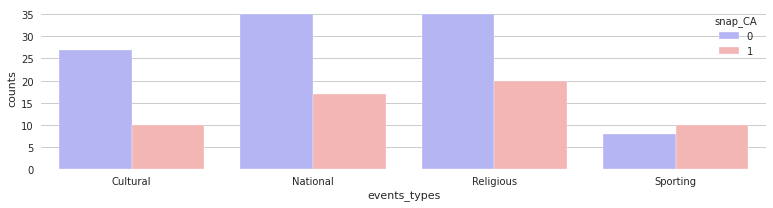

In [34]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.barplot(x = 'events_types', y='counts', hue='snap_CA', data=df, palette='bwr')
plt.show()

In [35]:
df = calendar_df.groupby(['events_names'])['snap_CA'].value_counts().reset_index(name='counts')

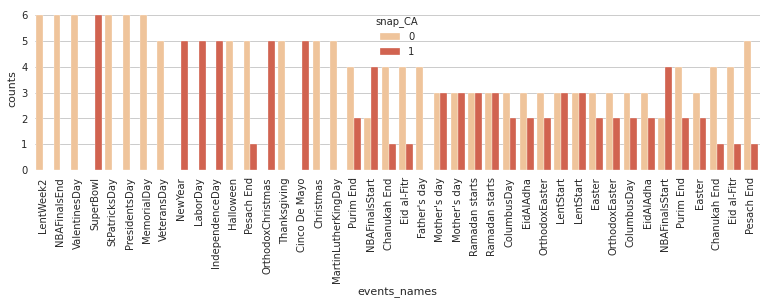

In [36]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.barplot(x = 'events_names', y='counts', hue='snap_CA', data=df, 
            order = df.sort_values(['counts'], ascending=False).events_names, 
            palette='OrRd')
plt.xticks(rotation=90)
plt.show()

Nhìn vào cả hai biểu đồ này cho thấy những dịp đặc biệt khi chương trình SNAP ở CA được sử dụng.

**Distribution of Sales Items vs Sales Revenue?**

Bây giờ chúng tôi có product_id df cũng nhưvenue_df, chúng tôi sẽ hợp nhất tập dữ liệu ngay bây giờ để bắt đầu khám phá các xu hướng của dữ liệu item_specific_data và sale_price_specific

In [37]:
#product id df (train_sales_df) vs revenue_df(sell_prices_df)
train_sales_prices_df = train_sales_df.merge(sell_prices_df, how='inner', on='item_id', 
                                            left_index=True, right_index=True, 
                                            validate="1:1")

MergeError: ignored